## ANDRAS

In [2]:
import pandas
import matplotlib.pyplot as plt
import math
import numpy as np
import sqlite3 as sql

In [3]:
data = pandas.read_csv("SalaryPrediction.csv")

## Which league pays its players the best?

In [4]:
footballer_wages = data.sort_values(by="Wage")[::-1]
leagues = set()
for index, row in data.iterrows():
    leagues.add(row["League"])
average_wages = []
for league in leagues:
    players_in_league = data.loc[data['League']==league]
    average_wage = round(sum([int(x.replace(',','')) for x in players_in_league['Wage']])/len(players_in_league))
    average_wages.append(average_wage)
    print(league)
    print(f"Average wage: €{average_wage}")



Premier League
Average wage: €2335982
Serie A
Average wage: €1336126
Primiera Liga
Average wage: €194827
La Liga
Average wage: €1520235
Bundesliga
Average wage: €1405219
Ligue 1 Uber Eats
Average wage: €1237427


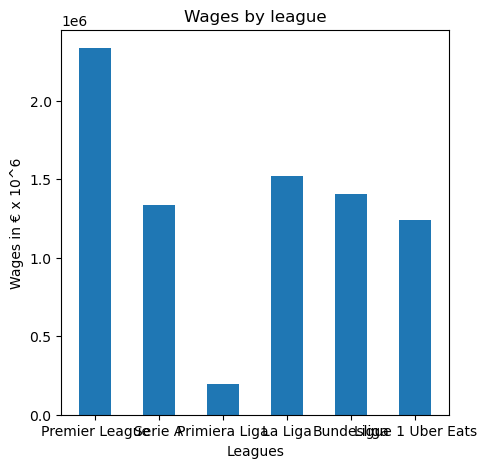

In [5]:
fig = plt.figure(figsize = (5, 5))
plt.bar(list(leagues), average_wages, width=0.5)
plt.title('Wages by league')
plt.xlabel("Leagues")
plt.ylabel("Wages in € x 10^6")
plt.show()

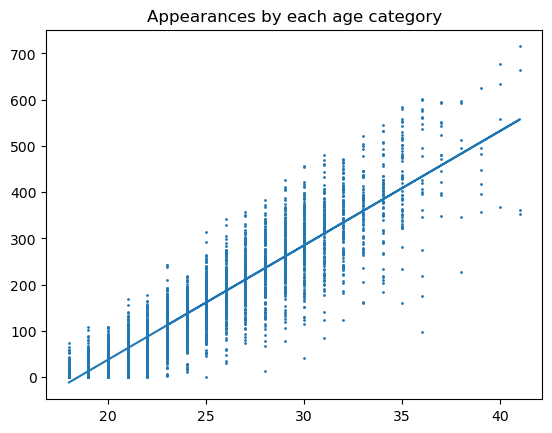

In [6]:
appearences = np.array([int(x) for x in data["Apps"]])
ages = np.array([int(x) for x in data["Age"]])
plt.scatter(ages, appearences, s=1)
plt.title("Appearances by each age category")
m, c = np.polyfit(ages, appearences, 1)
plt.plot(ages, m*ages + c)

In [7]:
db = sql.connect("european_database.sqlite")
db_cursor = db.cursor()

Text(0.5, 1.0, 'Average points earned at home and away')

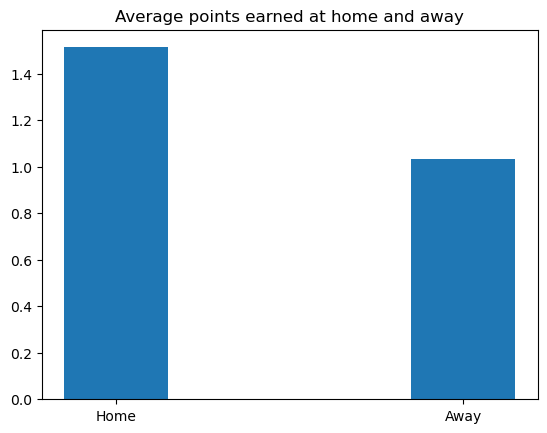

In [35]:
matches = db_cursor.execute("SELECT * FROM matchs").fetchall()
teams = set()
team_points_home = {}
team_points_away = {}
WIN = 3
DRAW = 1
LOSS = 0
for match in matches:
    team_points_home[match[2]] = [0, 0]
    team_points_away[match[3]] = [0, 0]

for match in matches:
    if match[6] == "H":
        team_points_home[match[2]][0] += WIN
        team_points_home[match[2]][1] += 1
        team_points_away[match[3]][0] += LOSS
        team_points_away[match[3]][1] += 1

    elif match[6] == "A":
        team_points_home[match[2]][0] += LOSS
        team_points_home[match[2]][1] += 1
        team_points_away[match[3]][0] += WIN
        team_points_away[match[3]][1] += 1
    elif match[6] == "D":
        team_points_home[match[2]][0] += DRAW
        team_points_home[match[2]][1] += 1
        team_points_away[match[3]][0] += DRAW
        team_points_away[match[3]][1] += 1
count_home = 0
count_away = 0
home_sum = 0
away_sum = 0
for team, points in team_points_away.items():
    count_away += 1
    away_sum +=  points[0] / points[1]
for team, points in team_points_home.items():
    count_home += 1
    home_sum += points[0] / points[1]
home_avg = home_sum/count_home
away_avg = away_sum/count_away

bars = np.array(["Home", "Away"])
vals = np.array([home_avg, away_avg])
plt.bar(bars, vals, width=[0.3, 0.3])
plt.title("Average points earned at home and away")
plt.show()

## MÁRK

Average Salary: 167.7916560020476
Minimum Age: 18
Maximum Experience (Apps): 715


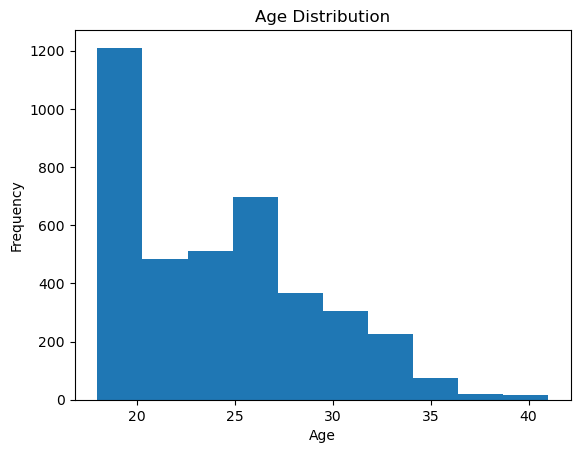

TypeError: Could not convert 46,427,00042,125,00034,821,00019,959,00019,500,00018,810,00018,200,00018,200,00018,200,00018,200,00017,680,00017,680,00016,121,00015,965,00015,600,00015,600,00015,476,00015,476,00015,080,00015,046,00015,046,00014,616,00014,616,00014,432,00014,432,00014,300,00014,040,00013,756,00013,747,00013,333,00013,272,00013,000,00013,000,00013,000,00012,896,00012,896,00012,480,00012,381,00012,381,00012,070,00012,037,00012,037,00011,960,00011,710,00011,700,00011,700,00011,440,00011,440,00011,177,00011,177,00011,173,00010,973,00010,400,00010,400,00010,400,00010,385,00010,380,00010,380,00010,346,00010,346,00010,346,00010,346,00010,346,00010,346,00010,317,00010,244,0009,887,0009,880,0009,880,0009,880,0009,672,0009,656,0009,578,0009,578,0009,457,0009,457,0009,439,0009,405,0009,360,0009,360,0009,360,0009,360,0009,360,0009,360,0009,360,0009,100,0009,100,0009,100,0009,100,0008,924,0008,845,0008,840,0008,840,0008,840,0008,840,0008,621,0008,598,0008,598,0008,598,0008,598,0008,598,0008,580,0008,320,0008,320,0008,320,0008,320,0008,320,0008,320,0008,320,0008,290,0008,190,0008,151,0008,082,0007,984,0007,984,0007,984,0007,983,0007,983,0007,983,0007,983,0007,983,0007,983,0007,800,0007,800,0007,800,0007,800,0007,800,0007,800,0007,800,0007,738,0007,738,0007,733,0007,621,0007,397,0007,397,0007,397,0007,308,0007,308,0007,280,0007,280,0007,280,0007,280,0007,222,0007,182,0007,173,0006,909,0006,909,0006,897,0006,878,0006,878,0006,878,0006,760,0006,760,0006,760,0006,760,0006,760,0006,760,0006,725,0006,706,0006,665,0006,630,0006,552,0006,500,0006,500,0006,500,0006,483,0006,466,0006,466,0006,448,0006,448,0006,388,0006,379,0006,335,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,240,0006,190,0006,141,0006,069,0006,018,0006,014,0005,720,0005,720,0005,720,0005,720,0005,720,0005,720,0005,720,0005,720,0005,720,0005,720,0005,720,0005,720,0005,604,0005,604,0005,588,0005,588,0005,587,0005,587,0005,587,0005,582,0005,527,0005,527,0005,527,0005,527,0005,460,0005,380,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,200,0005,173,0005,159,0005,159,0005,155,0005,155,0005,112,0005,043,0004,999,0004,974,0004,974,0004,974,0004,958,0004,940,0004,940,0004,940,0004,931,0004,793,0004,793,0004,793,0004,793,0004,793,0004,793,0004,785,0004,785,0004,785,0004,742,0004,729,0004,680,0004,680,0004,680,0004,680,0004,680,0004,680,0004,680,0004,680,0004,680,0004,680,0004,680,0004,680,0004,680,0004,643,0004,643,0004,595,0004,594,0004,559,0004,483,0004,474,0004,423,0004,423,0004,423,0004,420,0004,420,0004,420,0004,420,0004,368,0004,311,0004,311,0004,311,0004,311,0004,311,0004,299,0004,299,0004,299,0004,299,0004,299,0004,299,0004,299,0004,296,0004,259,0004,199,0004,199,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,160,0004,138,0004,127,0004,091,0004,056,0004,035,0004,004,0003,992,0003,992,0003,992,0003,987,0003,955,0003,910,0003,900,0003,900,0003,900,0003,900,0003,900,0003,900,0003,900,0003,900,0003,900,0003,900,0003,900,0003,900,0003,900,0003,900,0003,900,0003,880,0003,877,0003,871,0003,871,0003,871,0003,869,0003,869,0003,869,0003,869,0003,869,0003,828,0003,786,0003,770,0003,673,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,640,0003,586,0003,509,0003,509,0003,484,0003,476,0003,449,0003,448,0003,448,0003,448,0003,448,0003,439,0003,439,0003,439,0003,439,0003,439,0003,439,0003,439,0003,439,0003,439,0003,439,0003,439,0003,439,0003,439,0003,439,0003,439,0003,437,0003,437,0003,432,0003,404,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,380,0003,370,0003,362,0003,354,0003,353,0003,319,0003,319,0003,319,0003,319,0003,267,0003,267,0003,224,0003,198,0003,190,0003,190,0003,190,0003,190,0003,190,0003,190,0003,190,0003,190,0003,190,0003,190,0003,190,0003,138,0003,138,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,120,0003,095,0003,095,0003,095,0003,071,0003,035,0003,017,0003,017,0003,016,0003,016,0003,009,0003,009,0003,009,0003,009,0003,009,0003,009,0003,009,0003,007,0003,007,0003,007,0002,994,0002,923,0002,911,0002,871,0002,871,0002,871,0002,871,0002,860,0002,860,0002,860,0002,860,0002,860,0002,860,0002,860,0002,860,0002,860,0002,860,0002,860,0002,860,0002,860,0002,852,0002,837,0002,802,0002,802,0002,800,0002,786,0002,767,0002,767,0002,767,0002,767,0002,767,0002,761,0002,751,0002,751,0002,749,0002,735,0002,732,0002,718,0002,711,0002,711,0002,690,0002,690,0002,682,0002,621,0002,621,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,600,0002,592,0002,586,0002,586,0002,586,0002,586,0002,579,0002,579,0002,579,0002,579,0002,579,0002,579,0002,579,0002,579,0002,579,0002,579,0002,579,0002,579,0002,579,0002,579,0002,578,0002,578,0002,578,0002,578,0002,578,0002,555,0002,552,0002,552,0002,552,0002,552,0002,550,0002,494,0002,472,0002,466,0002,466,0002,466,0002,466,0002,466,0002,431,0002,431,0002,418,0002,397,0002,397,0002,397,0002,397,0002,397,0002,397,0002,397,0002,397,0002,392,0002,392,0002,392,0002,392,0002,381,0002,376,0002,364,0002,364,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,340,0002,297,0002,288,0002,264,0002,242,0002,242,0002,236,0002,235,0002,235,0002,235,0002,235,0002,233,0002,233,0002,233,0002,211,0002,207,0002,207,0002,207,0002,207,0002,199,0002,195,0002,184,0002,155,0002,154,0002,149,0002,149,0002,149,0002,149,0002,149,0002,149,0002,149,0002,149,0002,149,0002,149,0002,149,0002,149,0002,149,0002,149,0002,143,0002,129,0002,095,0002,084,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,080,0002,078,0002,073,0002,063,0002,059,0002,045,0002,017,0001,995,0001,991,0001,991,0001,991,0001,980,0001,977,0001,966,0001,966,0001,950,0001,933,0001,914,0001,914,0001,914,0001,914,0001,914,0001,914,0001,914,0001,898,0001,896,0001,896,0001,892,0001,892,0001,892,0001,892,0001,892,0001,890,0001,889,0001,881,0001,879,0001,879,0001,879,0001,871,0001,868,0001,857,0001,857,0001,856,0001,854,0001,835,0001,834,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,820,0001,815,0001,810,0001,802,0001,798,0001,797,0001,795,0001,793,0001,793,0001,767,0001,767,0001,763,0001,759,0001,759,0001,759,0001,759,0001,754,0001,742,0001,732,0001,726,0001,724,0001,724,0001,724,0001,724,0001,724,0001,722,0001,719,0001,719,0001,719,0001,719,0001,719,0001,719,0001,719,0001,718,0001,711,0001,695,0001,693,0001,681,0001,681,0001,664,0001,655,0001,655,0001,655,0001,655,0001,655,0001,655,0001,655,0001,655,0001,655,0001,650,0001,634,0001,632,0001,632,0001,627,0001,623,0001,612,0001,610,0001,598,0001,596,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,595,0001,585,0001,583,0001,582,0001,582,0001,579,0001,574,0001,572,0001,562,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,560,0001,552,0001,552,0001,549,0001,548,0001,548,0001,548,0001,548,0001,548,0001,548,0001,548,0001,546,0001,546,0001,546,0001,545,0001,543,0001,543,0001,534,0001,525,0001,505,0001,505,0001,503,0001,502,0001,482,0001,474,0001,473,0001,472,0001,462,0001,457,0001,456,0001,456,0001,444,0001,444,0001,441,0001,440,0001,440,0001,440,0001,440,0001,440,0001,440,0001,440,0001,438,0001,436,0001,435,0001,435,0001,435,0001,423,0001,419,0001,414,0001,412,0001,412,0001,410,0001,405,0001,401,0001,393,0001,384,0001,376,0001,375,0001,370,0001,356,0001,354,0001,354,0001,345,0001,345,0001,345,0001,345,0001,345,0001,340,0001,340,0001,334,0001,334,0001,328,0001,328,0001,328,0001,328,0001,328,0001,328,0001,328,0001,323,0001,310,0001,305,0001,301,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,300,0001,298,0001,298,0001,296,0001,293,0001,293,0001,293,0001,293,0001,293,0001,292,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,290,0001,289,0001,289,0001,289,0001,289,0001,287,0001,276,0001,276,0001,276,0001,276,0001,276,0001,276,0001,276,0001,276,0001,276,0001,276,0001,276,0001,276,0001,276,0001,276,0001,273,0001,268,0001,268,0001,266,0001,266,0001,256,0001,255,0001,238,0001,238,0001,237,0001,235,0001,233,0001,233,0001,232,0001,232,0001,224,0001,224,0001,222,0001,219,0001,216,0001,216,0001,216,0001,204,0001,201,0001,198,0001,197,0001,186,0001,184,0001,182,0001,178,0001,177,0001,171,0001,170,0001,169,0001,163,0001,163,0001,161,0001,161,0001,161,0001,161,0001,161,0001,161,0001,141,0001,141,0001,138,0001,137,0001,135,0001,134,0001,134,0001,134,0001,127,0001,121,0001,121,0001,121,0001,121,0001,121,0001,121,0001,121,0001,121,0001,121,0001,121,0001,121,0001,121,0001,118,0001,118,0001,116,0001,116,0001,116,0001,116,0001,107,0001,104,0001,104,0001,103,0001,103,0001,103,0001,103,0001,103,0001,103,0001,103,0001,103,0001,103,0001,103,0001,103,0001,096,0001,090,0001,090,0001,087,0001,086,0001,086,0001,078,0001,077,0001,076,0001,075,0001,075,0001,070,0001,069,0001,069,0001,053,0001,052,0001,052,0001,051,0001,051,0001,050,0001,050,0001,048,0001,047,0001,040,0001,040,0001,040,0001,040,0001,040,0001,040,0001,040,0001,040,0001,040,0001,040,0001,040,0001,040,0001,040,0001,040,0001,040,0001,037,0001,036,0001,035,0001,035,0001,035,0001,035,0001,035,0001,034,0001,032,0001,032,0001,032,0001,032,0001,032,0001,032,0001,032,0001,032,0001,032,0001,032,0001,032,0001,032,0001,032,0001,032,0001,031,0001,031,0001,031,0001,028,0001,022,0001,017,0001,017,0001,004,0001,004,0001,003,0001,003,000998,000991,000991,000987,000986,000986,000985,000985,000983,000980,000977,000977,000976,000973,000966,000966,000966,000964,000963,000963,000963,000963,000957,000957,000957,000957,000957,000957,000957,000957,000957,000957,000957,000953,000950,000948,000948,000947,000946,000946,000945,000945,000945,000941,000940,000929,000929,000928,000928,000928,000928,000923,000923,000923,000921,000920,000917,000917,000914,000910,000910,000908,000903,000903,000903,000903,000902,000898,000897,000897,000897,000897,000897,000897,000897,000893,000893,000888,000888,000885,000885,000885,000885,000884,000883,000881,000881,000881,000878,000877,000876,000876,000875,000872,000862,000862,000862,000862,000862,000862,000862,000860,000860,000860,000860,000860,000860,000860,000860,000860,000860,000860,000860,000860,000859,000859,000859,000859,000859,000859,000858,000858,000858,000853,000845,000839,000832,000832,000831,000830,000830,000830,000830,000830,000829,000829,000828,000827,000825,000825,000825,000824,000818,000818,000817,000817,000815,000815,000813,000807,000807,000803,000802,000802,000802,000802,000802,000802,000802,000802,000802,000802,000802,000800,000798,000797,000797,000797,000797,000797,000793,000791,000787,000787,000786,000785,000785,000785,000785,000785,000785,000780,000780,000780,000780,000780,000780,000780,000780,000780,000780,000780,000780,000780,000778,000776,000776,000776,000776,000776,000776,000776,000776,000776,000774,000774,000774,000774,000774,000774,000772,000770,000770,000770,000767,000762,000756,000756,000755,000752,000752,000752,000751,000748,000747,000742,000741,000740,000738,000736,000735,000733,000731,000731,000731,000731,000731,000731,000729,000727,000726,000726,000726,000723,000722,000722,000722,000722,000721,000718,000717,000716,000716,000713,000713,000713,000713,000712,000712,000712,000712,000712,000704,000702,000702,000702,000699,000697,000695,000695,000692,000690,000688,000688,000688,000688,000688,000688,000687,000687,000687,000684,000679,000679,000674,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000672,000670,000668,000667,000664,000664,000664,000664,000664,000664,000663,000662,000661,000661,000660,000658,000657,000657,000655,000655,000655,000655,000654,000654,000654,000654,000654,000653,000650,000650,000649,000649,000646,000646,000645,000645,000645,000645,000645,000645,000645,000645,000645,000645,000645,000645,000643,000642,000642,000638,000638,000638,000638,000638,000638,000638,000638,000638,000638,000638,000638,000638,000638,000636,000636,000636,000632,000632,000628,000624,000624,000624,000621,000620,000619,000619,000619,000619,000619,000616,000612,000608,000605,000605,000603,000602,000602,000598,000598,000597,000590,000583,000583,000581,000578,000576,000576,000572,000572,000572,000572,000572,000572,000570,000568,000568,000567,000567,000567,000567,000567,000567,000567,000567,000567,000566,000561,000560,000560,000560,000560,000560,000560,000560,000560,000560,000560,000560,000560,000560,000559,000559,000559,000559,000559,000554,000554,000552,000552,000552,000552,000552,000552,000544,000543,000542,000542,000542,000541,000541,000541,000538,000538,000538,000538,000538,000538,000536,000536,000534,000534,000533,000533,000530,000530,000527,000526,000526,000524,000523,000523,000523,000523,000520,000520,000520,000520,000520,000520,000520,000520,000520,000517,000517,000516,000516,000516,000516,000516,000516,000515,000514,000511,000510,000508,000508,000508,000508,000507,000507,000504,000504,000502,000501,000499,000492,000491,000490,000485,000484,000484,000483,000483,000483,000483,000479,000479,000478,000478,000478,000478,000478,000478,000478,000478,000477,000477,000476,000473,000471,000471,000467,000467,000467,000466,000464,000464,000464,000463,000462,000462,000461,000459,000459,000457,000455,000453,000452,000452,000451,000451,000451,000450,000448,000448,000448,000448,000448,000448,000448,000448,000448,000448,000448,000445,000441,000441,000441,000441,000441,000441,000440,000440,000440,000438,000438,000438,000437,000436,000436,000436,000436,000436,000436,000436,000435,000435,000435,000432,000432,000431,000430,000430,000430,000430,000430,000430,000430,000430,000428,000428,000428,000428,000427,000426,000426,000426,000426,000421,000421,000420,000417,000416,000416,000416,000416,000416,000415,000415,000413,000413,000412,000412,000412,000412,000412,000412,000411,000411,000410,000408,000408,000408,000408,000408,000408,000405,000404,000403,000403,000403,000403,000403,000403,000401,000399,000399,000399,000398,000398,000398,000398,000397,000397,000395,000395,000395,000393,000393,000392,000392,000392,000392,000392,000390,000390,000388,000388,000388,000387,000383,000383,000382,000381,000381,000381,000381,000381,000381,000381,000381,000381,000381,000381,000379,000379,000374,000369,000368,000367,000365,000365,000364,000364,000364,000364,000364,000364,000363,000362,000362,000362,000362,000361,000359,000359,000359,000359,000359,000357,000356,000356,000356,000355,000355,000353,000353,000353,000353,000353,000352,000352,000351,000349,000349,000349,000348,000347,000347,000345,000344,000344,000344,000343,000343,000343,000341,000341,000340,000338,000338,000338,000337,000337,000336,000336,000336,000336,000336,000336,000336,000336,000336,000332,000332,000330,000329,000328,000328,000328,000328,000325,000325,000325,000325,000325,000323,000323,000321,000320,000320,000319,000319,000319,000319,000319,000316,000315,000315,000315,000315,000315,000314,000314,000314,000314,000314,000312,000312,000312,000312,000312,000312,000311,000310,000310,000310,000309,000309,000309,000309,000307,000307,000304,000303,000303,000302,000302,000302,000301,000301,000301,000301,000301,000300,000300,000299,000299,000299,000298,000298,000298,000298,000298,000298,000298,000298,000298,000293,000293,000293,000292,000291,000291,000291,000291,000291,000291,000290,000290,000289,000289,000287,000287,000287,000287,000286,000286,000285,000284,000284,000284,000282,000282,000281,000280,000280,000280,000280,000280,000279,000278,000276,000276,000276,000276,000274,000273,000272,000270,000270,000270,000270,000270,000270,000269,000269,000269,000269,000269,000269,000269,000269,000269,000269,000268,000264,000264,000263,000262,000261,000261,000260,000260,000260,000260,000260,000260,000260,000260,000260,000260,000260,000260,000260,000260,000260,000260,000260,000260,000260,000260,000260,000259,000258,000258,000258,000258,000258,000258,000258,000258,000258,000257,000257,000256,000255,000255,000254,000252,000252,000251,000250,000248,000247,000247,000247,000247,000244,000244,000244,000242,000242,000242,000242,000242,000241,000241,000241,000241,000241,000240,000237,000237,000236,000234,000234,000233,000232,000232,000231,000230,000229,000228,000227,000227,000225,000225,000224,000224,000224,000224,000224,000224,000224,000224,000224,000224,000224,000224,000224,000224,000224,000224,000224,000223,000223,000220,000220,000218,000217,000217,000217,000217,000216,000215,000215,000215,000215,000215,000215,000215,000215,000214,000214,000214,000213,000213,000213,000210,000210,000209,000208,000208,000208,000208,000208,000208,000206,000206,000204,000204,000203,000203,000203,000202,000202,000202,000202,000202,000202,000202,000202,000201,000200,000199,000196,000193,000193,000192,000192,000191,000191,000190,000190,000190,000190,000188,000187,000187,000187,000187,000187,000187,000186,000186,000186,000186,000183,000183,000182,000182,000182,000182,000182,000182,000181,000181,000181,000181,000179,000179,000179,000179,000179,000179,000179,000179,000179,000179,000179,000179,000178,000177,000177,000177,000176,000174,000174,000173,000173,000172,000172,000172,000172,000172,000172,000171,000171,000170,000169,000169,000169,000169,000168,000168,000168,000168,000168,000168,000168,000168,000167,000166,000166,000165,000165,000164,000164,000164,000164,000164,000164,000164,000163,000163,000162,000162,000161,000161,000160,000160,000160,000160,000159,000159,000159,000159,000159,000158,000157,000157,000157,000157,000157,000157,000157,000157,000157,000157,000157,000157,000157,000156,000156,000156,000156,000156,000156,000156,000156,000156,000156,000156,000156,000156,000156,000156,000156,000156,000156,000156,000156,000155,000155,000153,000153,000150,000150,000150,000150,000150,000150,000149,000148,000147,000147,000147,000147,000147,000147,000147,000147,000146,000146,000146,000146,000145,000144,000144,000144,000143,000143,000143,000143,000141,000141,000141,000141,000141,000141,000141,000141,000141,000141,000141,000141,000141,000141,000141,000141,000141,000141,000140,000140,000140,000139,000139,000138,000138,000138,000138,000138,000138,000138,000138,000138,000138,000138,000138,000138,000138,000137,000137,000136,000136,000135,000135,000135,000135,000134,000134,000134,000134,000134,000134,000133,000133,000133,000132,000132,000132,000132,000132,000132,000132,000132,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000130,000129,000129,000129,000128,000128,000128,000128,000128,000128,000128,000128,000128,000128,000128,000127,000126,000125,000125,000124,000124,000124,000124,000123,000123,000123,000123,000123,000123,000123,000123,000123,000123,000123,000123,000123,000123,000123,000123,000123,000123,000123,000123,000122,000120,000120,000119,000119,000119,000119,000119,000116,000114,000114,000113,000113,000113,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000112,000111,000111,000110,000110,000110,000110,000110,000107,000106,000106,000105,000105,000105,000105,000105,000105,000105,000105,000105,000105,000105,000105,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000104,000103,000103,000103,000103,000101,000101,000101,000101,000101,000101,000101,000101,000101,000101,000101,00099,50099,00096,50096,50096,50096,50096,50096,50096,50096,50096,50096,00095,00095,00095,00095,00094,00093,50093,00092,50092,00092,00092,00091,50090,50090,50089,50089,50088,00087,50087,50087,50087,50087,50087,50087,50087,50087,50087,50087,50087,50087,50087,50087,50087,50087,50087,50087,50087,50087,00086,00086,00086,00086,00086,00086,00086,00086,00086,00084,50083,00083,00083,00083,00083,00083,00083,00083,00083,00083,00083,00083,00083,00083,00083,00083,00083,00083,00083,00083,00083,00081,00080,50080,50080,00078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,50078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00078,00077,50076,50076,50075,50075,50075,00074,00074,00074,00074,00074,00074,00074,00074,00074,00074,00074,00074,00074,00074,00074,00073,00073,00073,00073,00073,00071,50071,50071,50071,00069,50069,50069,50069,50069,00069,00068,50068,50068,50068,50068,50068,50068,50068,50068,50068,50067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00067,00066,50065,50065,50065,50065,50065,50065,50065,00065,00065,00065,00065,00065,00065,00065,00065,00065,00065,00065,00065,00065,00065,00065,00065,00064,50064,50064,00063,00063,00062,50062,50062,50062,50062,50062,50062,50062,50062,50062,50062,50061,50061,00060,50060,50060,50060,50060,50060,50060,50060,50060,50060,50060,50060,50060,00059,00058,50058,50058,50058,50058,50058,50058,50058,50058,50058,50058,00057,00056,00056,00056,00056,00056,00056,00056,00056,00055,50054,50054,00054,00054,00054,00053,50053,50053,50053,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00052,00051,50051,50051,50051,50051,50051,50051,50051,50051,50051,50051,50051,50051,50050,50050,50050,50050,00049,50049,50049,00049,00047,50047,50047,50047,00047,00047,00047,00047,00047,00047,00047,00047,00047,00047,00047,00047,00046,00046,00045,50045,50045,00044,00044,00044,00043,50043,50043,50043,50043,50043,50043,50043,50043,50043,50043,50043,50043,50043,00043,00043,00043,00043,00043,00042,50042,50042,50042,50042,50041,50041,50041,50041,50041,50041,50041,50041,50041,50041,50041,50041,00041,00041,00041,00040,50040,50040,00040,00040,00040,00040,00040,00040,00039,00039,00039,00039,00039,00039,00039,00039,00039,00039,00039,00039,00039,00039,00038,50038,50038,50038,50038,50038,00038,00038,00038,00038,00038,00038,00037,50037,50037,50037,50037,50037,00037,00037,00037,00037,00036,50036,50036,00036,00036,00036,00036,00035,50035,50035,00035,00034,50034,50034,50034,50034,50034,00034,00034,00033,50033,50033,50033,50033,50033,50033,50033,50033,50033,50033,50033,50033,50033,50033,50033,50032,50032,50032,50032,50032,50032,00032,00032,00032,00032,00031,50031,50031,50031,50031,50031,50031,50031,50031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00031,00030,50030,50030,00030,00030,00030,00030,00030,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00029,00028,50028,50028,50028,50028,00028,00028,00027,50027,50027,50027,50027,50027,50027,00027,00027,00027,00027,00027,00026,50026,50026,50026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00026,00025,50025,00025,00025,00025,00025,00025,00025,00025,00025,00025,00024,50024,50024,50024,50024,50024,50024,50024,50024,00023,50023,50023,50023,50023,50023,50023,50023,00023,00023,00023,00023,00022,50022,50022,50022,50022,50022,50022,50022,50022,50022,50022,50022,50022,50022,50022,50022,50021,50021,50021,50021,50021,00021,00021,00021,00021,00021,00021,00021,00021,00021,00021,00021,00020,50020,50020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00020,00019,75019,50019,50019,25019,25019,00019,00018,75018,50018,50018,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,25018,00018,00018,00018,00018,00018,00018,00018,00018,00018,00018,00018,00018,00018,00018,00018,00018,00018,00018,00018,00017,50017,50017,50017,50017,50017,50017,50017,50017,50017,50017,25017,25017,25017,00016,75016,75016,75016,75016,75016,75016,75016,75016,75016,75016,75016,75016,75016,75016,75016,75016,75016,50016,00016,00016,00016,00015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,75015,50015,50015,50015,50015,50015,50015,50014,75014,75014,50014,50014,50014,25014,00013,75013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,50013,25013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00013,00012,50012,25012,25012,25012,25012,25012,00011,75011,75011,2509,0008,5007,5007,5005,7505,2505,2505,2505,2504,5003,8003,6003,4003,2002,9002,7001,400 to numeric

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Read data from a CSV file
data = pd.read_csv('SalaryPrediction.csv')

# Create an SQLite database
conn = sqlite3.connect('SalaryPrediction.db')

# Create a table and insert data
data.to_sql('player_data', conn, if_exists='replace', index=False)

# Export data from the existing database to a new database
existing_conn = sqlite3.connect('SalaryPrediction.db')
new_conn = sqlite3.connect('NewSalaryPrediction.db')

data_from_existing = pd.read_sql_query("SELECT * FROM player_data", existing_conn)
data_from_existing.to_sql('player_data', new_conn, if_exists='replace', index=False)

existing_conn.close()
new_conn.close()

# Filter data by a specific club (e.g., PSG)
filtered_data = data[data['Club'] == 'PSG']

# Insert filtered data into the SQLite table
filtered_data.to_sql('filtered_players', conn, if_exists='replace', index=False)

# Ask the user for input
new_data = {
    'Wage': float(input('Enter Wage: ')),
    'Age': int(input('Enter Age: ')),
    'Club': input('Enter Club: '),
    # ... Collect other inputs
}

# Add new data to the SQLite table
pd.DataFrame(new_data, index=[0]).to_sql('new_player_data', conn, if_exists='append', index=False)

# Allow user to specify an age limit to remove records
age_limit = int(input('Enter the age limit to remove records: '))
conn.execute(f"DELETE FROM player_data WHERE Age < {age_limit}")

# Allow user to modify data based on specific conditions (e.g., wage increase)
increase_wage = float(input('Enter the amount to increase wage: '))
conn.execute(f"UPDATE player_data SET Wage = Wage + {increase_wage} WHERE Club = 'PSG'")

# Calculate statistics using SQL queries or Pandas functions
average_salary = pd.read_sql_query("SELECT AVG(Wage) FROM player_data", conn)
min_age = pd.read_sql_query("SELECT MIN(Age) FROM player_data", conn)
max_experience = pd.read_sql_query("SELECT MAX(Apps) FROM player_data", conn)

print(f"Average Salary: {average_salary.iloc[0,0]}")
print(f"Minimum Age: {min_age.iloc[0,0]}")
print(f"Maximum Experience (Apps): {max_experience.iloc[0,0]}")

# Visualize data in different ways (e.g., histogram, scatter plot)
plt.hist(data['Age'], )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Data Normalization
data['Normalized_Wage'] = (data['Wage'] - data['Wage'].mean()) / data['Wage'].std()

# Handling Missing Values
data.fillna(data.mean(), inplace=True)